In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time


In [ ]:
train=pd.read_csv('/content/Train_data.csv')
test=pd.read_csv('/content/Test_data.csv')

In [ ]:
train.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
train=train.dropna()
test=test.dropna()

In [ ]:
print(train.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0               0       0    0  ...                  25   
1               0       0    0  ...                   1   
2               0       0    0  ...                  26   
3               0       0    0  ...                 255   
4               0       0    0  ...                 255   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [ ]:
print(test.head())

   duration protocol_type   service  flag  src_bytes  dst_bytes  land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   wrong_fragment  urgent  hot  ...  dst_host_count  dst_host_srv_count  \
0               0       0    0  ...             255                  10   
1               0       0    0  ...             255                   1   
2               0       0    0  ...             134                  86   
3               0       0    0  ...               3                  57   
4               0       0    0  ...              29                  86   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.04                    0.06   
1   

In [ ]:
train.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
cols=train.select_dtypes(include=['float64','int64']).columns
sc_train=scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test=scaler.fit_transform(test.select_dtypes(include=['float64','int64']))
sc_traindf=pd.DataFrame(sc_train,columns=cols)
sc_testdf=pd.DataFrame(sc_test,columns=cols)


In [ ]:
sc_traindf.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,-0.113551,-0.009889,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,-0.328634,-0.813985,-0.779157,-0.280673,0.073120,-0.287993,-0.641804,-0.627365,-0.221668,-0.374281
1,-0.113551,-0.010032,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-1.030895,-1.157831,2.764403,2.375620,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281
2,-0.113551,-0.010093,-0.039310,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,-0.807626,-0.021873,...,0.732059,-0.804947,-0.935081,-0.173828,-0.478183,-0.287993,1.603834,1.614454,-0.385140,-0.374281
3,-0.113551,-0.009996,0.052473,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,-1.540854,1.264742,1.069663,-0.440940,-0.380894,0.073759,-0.574435,-0.604947,-0.385140,-0.342768
4,-0.113551,-0.010010,-0.034582,-0.00891,-0.091223,-0.006301,-0.091933,-0.02622,1.238197,-0.021873,...,0.732059,1.264742,1.069663,-0.440940,-0.478183,-0.287993,-0.641804,-0.627365,-0.385140,-0.374281


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
cato_train=train.select_dtypes(include=['object']).copy()
cato_test=test.select_dtypes(include=['object']).copy()
train_cato=cato_train.apply(encoder.fit_transform)
test_cato=cato_test.apply(encoder.fit_transform)

etrain=train_cato.drop(['class'],axis=1)
cato_Ytrain=train_cato[['class']].copy()

In [ ]:
train_x=pd.concat([sc_traindf,etrain],axis=1)
train_y=train['class']

In [ ]:
train_x.shape

(25192, 41)

In [ ]:
test_df=pd.concat([sc_testdf,test_cato],axis=1)

In [ ]:
test_df.shape

(22544, 41)

<Axes: xlabel='feature'>

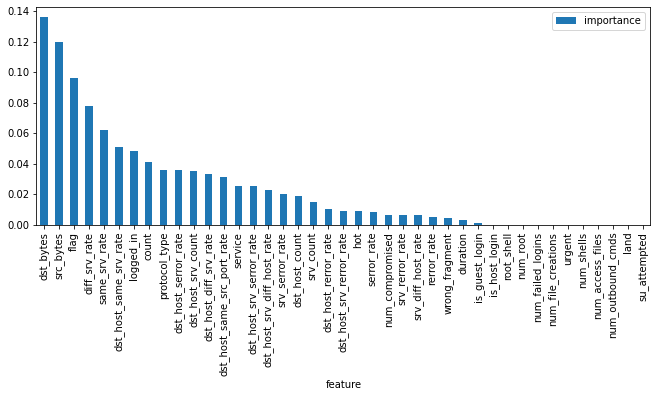

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier()
forest.fit(train_x,train_y)
score=np.round(forest.feature_importances_,3)
imp=pd.DataFrame({'feature':train_x.columns,'importance':score})
imp=imp.sort_values('importance',ascending=False).set_index('feature')
plt.rcParams['figure.figsize']=(11,4)
imp.plot.bar()

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rf=RandomForestClassifier()

rfe=RFE(rf,n_features_to_select=15)
rfe=rfe.fit(train_x,train_y)

feature_map=[(i,v) for i,v in itertools.zip_longest(rfe.get_support(),train_x.columns)]
selected_f=[v for i,v in feature_map if i ==True ]
selected_f

['src_bytes',
 'dst_bytes',
 'hot',
 'count',
 'srv_count',
 'same_srv_rate',
 'diff_srv_rate',
 'dst_host_srv_count',
 'dst_host_same_srv_rate',
 'dst_host_diff_srv_rate',
 'dst_host_same_src_port_rate',
 'dst_host_srv_diff_host_rate',
 'protocol_type',
 'service',
 'flag']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train,Y_test=train_test_split(train_x,train_y,train_size=0.70,random_state=2)

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
KNN_classifier=KNeighborsClassifier(n_jobs=-1)
KNN_classifier.fit(train_x,train_y)

LGR_classifier=LogisticRegression(n_jobs=-1,random_state=0)
LGR_classifier.fit(train_x,train_y)

BNB_classifier=BernoulliNB()
BNB_classifier.fit(train_x,train_y)

DT_classifier=tree.DecisionTreeClassifier(criterion='entropy',random_state=0)
DT_classifier.fit(train_x,train_y)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
from sklearn import metrics

In [ ]:
models=[]
models.append(('KNN Classifier',KNN_classifier))
models.append(('Logistic regression',LGR_classifier))
models.append(('Naive Bayes',BNB_classifier))
models.append(('Decision Tree',DT_classifier))

for i,v in models:
  scores=cross_val_score(v,X_train,Y_train,cv=10)
  accuracy=metrics.accuracy_score(Y_train,v.predict(X_train))
  confusion_metrix=metrics.confusion_matrix(Y_train,v.predict(X_train))
  classification=metrics.classification_report(Y_train,v.predict(X_train))
  print()
  print('----------{} Model Evaluation ----------'.format(i))
  print()
  print('Cross Validation Mean Socre-',scores.mean())
  print()
  print('Accuracy=',accuracy)
  print()
  print('Confusion Matrix=',confusion_metrix)
  print()
  print('Classification Report ',classification)
  print()




----------KNN Classifier Model Evaluation ----------

Cross Validation Mean Socre- 0.9914370153431007

Accuracy= 0.995349892253601

Confusion Matrix= [[8186   59]
 [  23 9366]]

Classification Report                precision    recall  f1-score   support

     anomaly       1.00      0.99      1.00      8245
      normal       0.99      1.00      1.00      9389

    accuracy                           1.00     17634
   macro avg       1.00      1.00      1.00     17634
weighted avg       1.00      1.00      1.00     17634



----------Logistic regression Model Evaluation ----------

Cross Validation Mean Socre- 0.953838894226626

Accuracy= 0.9540093002154928

Confusion Matrix= [[7745  500]
 [ 311 9078]]

Classification Report                precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      8245
      normal       0.95      0.97      0.96      9389

    accuracy                           0.95     17634
   macro avg       0.95      0.95      0.95  

In [ ]:
for i,v in models:
  accuracy=metrics.accuracy_score(Y_test,v.predict(X_test))
  confusion_matrix=metrics.confusion_matrix(Y_test,v.predict(X_test))
  classification=metrics.classification_report(Y_test,v.predict(X_test))
  print()
  print('---------{} Model Test Result---------'.format(i))
  print()
  print('Accuracy=',accuracy)
  print()
  print('Confusion Matrix=',confusion_matrix)
  print()
  print('Classification Report',classification)
  print()


---------KNN Classifier Model Test Result---------

Accuracy= 0.9944429743318338

Confusion Matrix= [[3473   25]
 [  17 4043]]

Classification Report               precision    recall  f1-score   support

     anomaly       1.00      0.99      0.99      3498
      normal       0.99      1.00      0.99      4060

    accuracy                           0.99      7558
   macro avg       0.99      0.99      0.99      7558
weighted avg       0.99      0.99      0.99      7558



---------Logistic regression Model Test Result---------

Accuracy= 0.9550145541148451

Confusion Matrix= [[3289  209]
 [ 131 3929]]

Classification Report               precision    recall  f1-score   support

     anomaly       0.96      0.94      0.95      3498
      normal       0.95      0.97      0.96      4060

    accuracy                           0.96      7558
   macro avg       0.96      0.95      0.95      7558
weighted avg       0.96      0.96      0.95      7558



---------Naive Bayes Model Test Resu